In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime

%matplotlib inline

plt.style.use('bmh')

In [31]:
def create_plot(series, name):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(name)

    sns.lineplot(ax = ax[0], x = series.index, y = series.values, color = 'b')
    ax[0].set_title("Time series's of data")
    ax[0].set_xlabel('Date')

    sns.distplot(series, color='g', bins=100, hist_kws={'alpha': 0.4}, ax = ax[1])
    ax[1].set_title("Histogram's of data")
    return

In [107]:
baa = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/BAA10Y_monthly.csv')
baa.iloc[:, 0] = baa.iloc[:, 0].astype('datetime64[ms]')
baa.set_index(baa.iloc[:, 0], drop = True, inplace = True)
baa = baa.iloc[:, 1]
#baa = np.log(baa).diff().fillna(0)
baa = baa[(baa.index >= datetime(2000, 11, 1)) & (baa.index <= datetime(2020, 11, 1))]
print(baa.describe())

count    241.000000
mean       2.637810
std        0.750613
min        1.553000
25%        2.124545
50%        2.624286
75%        2.989048
max        6.008696
Name: BAA10Y, dtype: float64


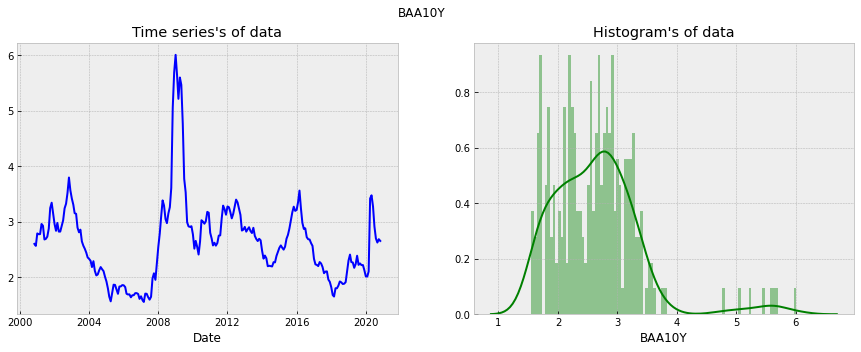

In [108]:
create_plot(baa, 'BAA10Y')

In [109]:
dtb = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/DTB3_monthly.csv')
dtb.iloc[:, 0] = dtb.iloc[:, 0].astype('datetime64[ms]')
dtb.set_index(dtb.iloc[:, 0], drop = True, inplace = True)
dtb = dtb.iloc[:, 1]
#dtb = dtb.diff().fillna(0)
dtb = dtb[(dtb.index >= datetime(2000, 11, 1)) & (dtb.index <= datetime(2020, 11, 1))]
print(dtb.describe())

count    241.000000
mean       1.425978
std        1.591207
min        0.011429
25%        0.104286
50%        0.936957
75%        2.126316
max        6.171905
Name: DTB3, dtype: float64


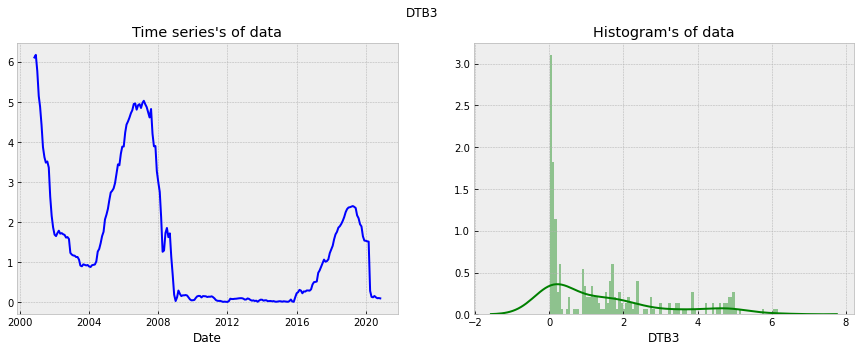

In [110]:
create_plot(dtb, 'DTB3')

In [111]:
dsg = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/DGS10_monthly.csv')
dsg.iloc[:, 0] = dsg.iloc[:, 0].astype('datetime64[ms]')
dsg.set_index(dsg.iloc[:, 0], drop = True, inplace = True)
dsg = dsg.iloc[:, 1]
#dsg = dsg.diff().fillna(0)
dsg = dsg[(dsg.index >= datetime(2000, 11, 1)) & (dsg.index <= datetime(2020, 11, 1))]
print(dsg.describe())

count    241.000000
mean       3.223692
std        1.210803
min        0.623636
25%        2.209130
50%        3.011429
75%        4.257273
max        5.738571
Name: DGS10, dtype: float64


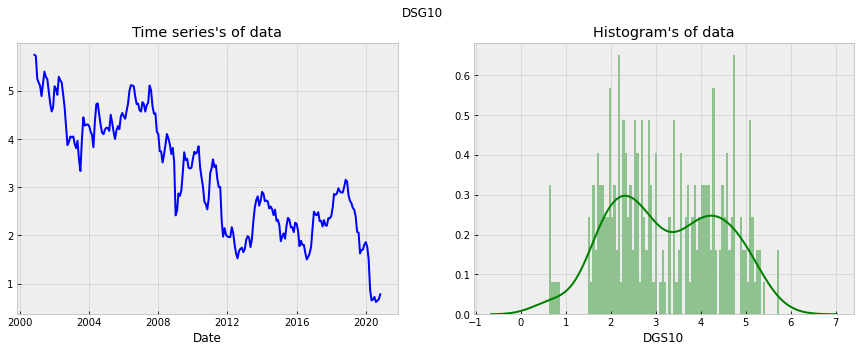

In [112]:
create_plot(dsg, 'DSG10')

In [59]:
wti = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/DCOILWTICO_monthly.csv')
wti.iloc[:, 0] = wti.iloc[:, 0].astype('datetime64[ms]')
wti.set_index(wti.iloc[:, 0], drop = True, inplace = True)
wti = wti.iloc[:, 1]
wti = np.log(wti).diff().fillna(0)
wti = wti[(wti.index >= datetime(2000, 11, 1)) & (wti.index <= datetime(2020, 11, 1))]
print(wti.describe())

count    241.000000
mean       0.000680
std        0.107302
min       -0.568191
25%       -0.046184
50%        0.014202
75%        0.056842
max        0.545852
Name: DCOILWTICO, dtype: float64


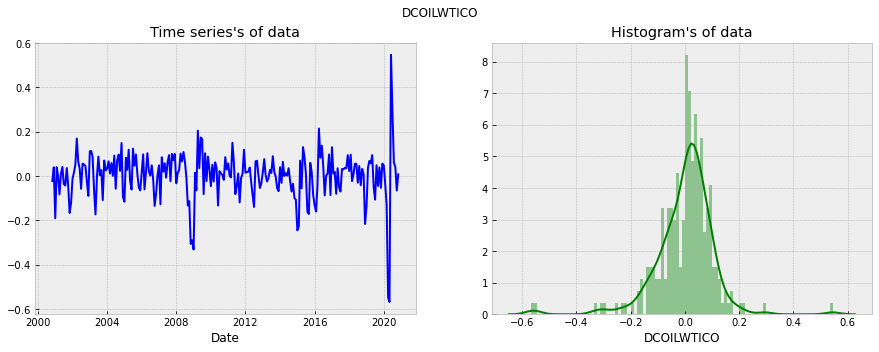

In [60]:
create_plot(wti, 'DCOILWTICO')

In [113]:
eff = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/EFFR_monthly.csv')
eff.iloc[:, 0] = eff.iloc[:, 0].astype('datetime64[ms]')
eff.set_index(eff.iloc[:, 0], drop = True, inplace = True)
eff = eff.iloc[:, 1]
#eff = eff.diff().fillna(0)
eff = eff[(eff.index >= datetime(2000, 11, 1)) & (eff.index <= datetime(2020, 11, 1))]
print(eff.describe())

count    241.000000
mean       1.566296
std        1.727593
min        0.048636
25%        0.145238
50%        1.015789
75%        2.267000
max        6.523333
Name: EFFR, dtype: float64


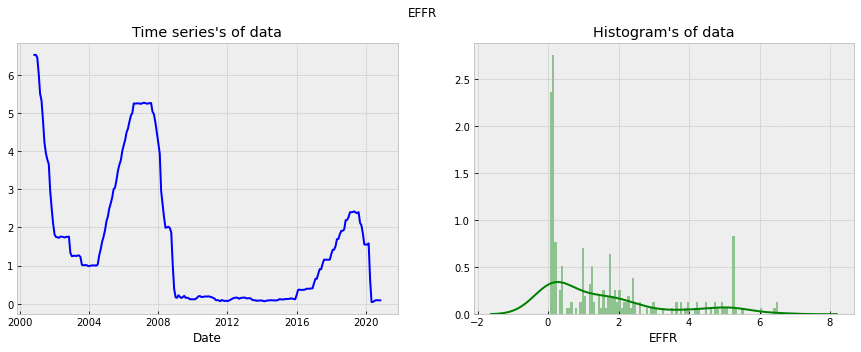

In [114]:
create_plot(eff, 'EFFR')

In [115]:
nfc = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/NFCI_monthly.csv')
nfc.iloc[:, 0] = nfc.iloc[:, 0].astype('datetime64[ms]')
nfc.set_index(nfc.iloc[:, 0], drop = True, inplace = True)
nfc = nfc.iloc[:, 1]
#nfc = nfc.diff().fillna(0)
nfc = nfc[(nfc.index >= datetime(2000, 11, 1)) & (nfc.index <= datetime(2020, 11, 1))]
print(nfc.describe())

count    241.000000
mean      -0.348602
std        0.550071
min       -0.803402
25%       -0.637933
50%       -0.515176
75%       -0.328058
max        2.674955
Name: NFCI, dtype: float64


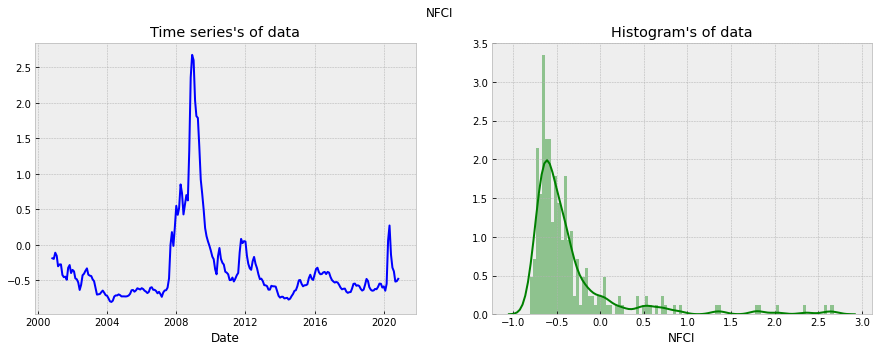

In [116]:
create_plot(nfc, 'NFCI')

In [117]:
vix = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/VIXCLS_monthly.csv')
vix.iloc[:, 0] = vix.iloc[:, 0].astype('datetime64[ms]')
vix.set_index(vix.iloc[:, 0], drop = True, inplace = True)
vix = vix.iloc[:, 1]
#vix = np.log(vix).diff().fillna(0)
vix = vix[(vix.index >= datetime(2000, 11, 1)) & (vix.index <= datetime(2020, 11, 1))]
print(vix.describe())

count    241.000000
mean      19.806529
std        8.690204
min       10.125455
25%       13.853913
50%       17.342500
75%       23.612857
max       62.253500
Name: VIXCLS, dtype: float64


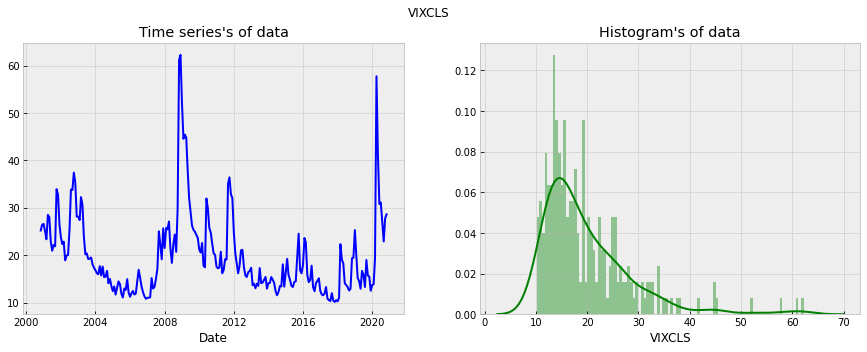

In [118]:
create_plot(vix, 'VIXCLS')

In [119]:
vxo = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/VXOCLS_monthly.csv')
vxo.iloc[:, 0] = vxo.iloc[:, 0].astype('datetime64[ms]')
vxo.set_index(vxo.iloc[:, 0], drop = True, inplace = True)
vxo = vxo.iloc[:, 1]
#vxo = np.log(vxo).diff().fillna(0)
vxo = vxo[(vxo.index >= datetime(2000, 11, 1)) & (vxo.index <= datetime(2020, 11, 1))]
print(vxo.describe())

count    241.000000
mean      20.014537
std        9.670355
min        8.020000
25%       13.454091
50%       16.911304
75%       24.241905
max       65.446522
Name: VXOCLS, dtype: float64


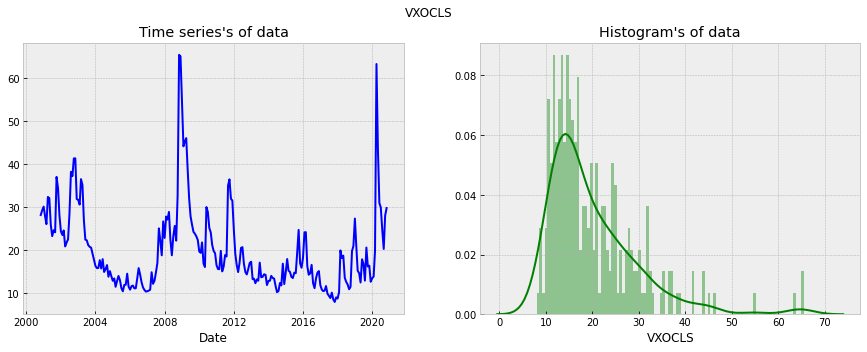

In [120]:
create_plot(vxo, 'VXOCLS')

In [79]:
cfnai = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CFNAI.csv')
cfnai.DATE = pd.to_datetime(cfnai.DATE)
cfnai = cfnai.set_index(cfnai.DATE)
cfnai = cfnai.iloc[:, 1]
cfnai = cfnai[(cfnai.index >= datetime(2000, 11, 1)) & (cfnai.index <= datetime(2020, 11, 1))]
print(cfnai.describe())

count    241.000000
mean      -0.159046
std        1.381864
min      -17.730000
25%       -0.310000
50%       -0.040000
75%        0.180000
max        5.960000
Name: CFNAI, dtype: float64


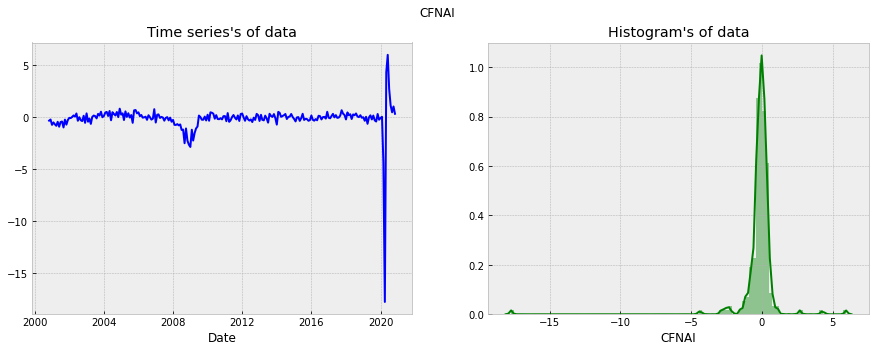

In [80]:
create_plot(cfnai, 'CFNAI')

In [81]:
cpi = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CPIAUCSL.csv')
cpi['Inflation'] = (cpi.CPIAUCSL / cpi.CPIAUCSL.shift(1) - 1) * 100
cpi.DATE = pd.to_datetime(cpi.DATE)
cpi = cpi.set_index(cpi.DATE)
inf = cpi.iloc[:, 2]
inf = inf[(inf.index >= datetime(2000, 11, 1)) & (inf.index <= datetime(2020, 11, 1))]
print(inf.describe())

count    241.000000
mean       0.168942
std        0.295561
min       -1.770548
25%        0.041416
50%        0.186419
75%        0.317125
max        1.376849
Name: Inflation, dtype: float64


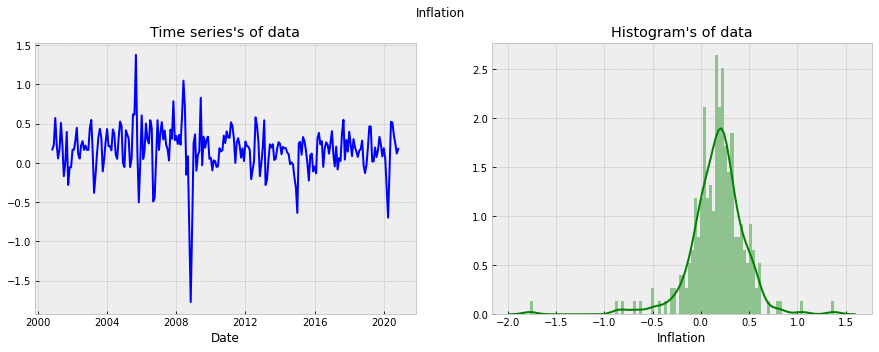

In [82]:
create_plot(inf, 'Inflation')

In [85]:
houst = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/HOUST.csv')
#houst.HOUST = (houst.HOUST - np.min(houst.HOUST))/(np.max(houst.HOUST) - np.min(houst.HOUST))
#houst.HOUST = (houst.HOUST / houst.HOUST.shift(1) - 1) * 100
houst.DATE = pd.to_datetime(houst.DATE)
houst = houst.set_index(houst.DATE)
houst = houst.iloc[:, 1]
houst = np.log(houst).diff().fillna(0)
houst = houst[(houst.index >= datetime(2000, 11, 1)) & (houst.index <= datetime(2020, 11, 1))]
print(houst.describe())

count    241.000000
mean       0.000077
std        0.085542
min       -0.306508
25%       -0.060594
50%        0.002499
75%        0.059219
max        0.214775
Name: HOUST, dtype: float64


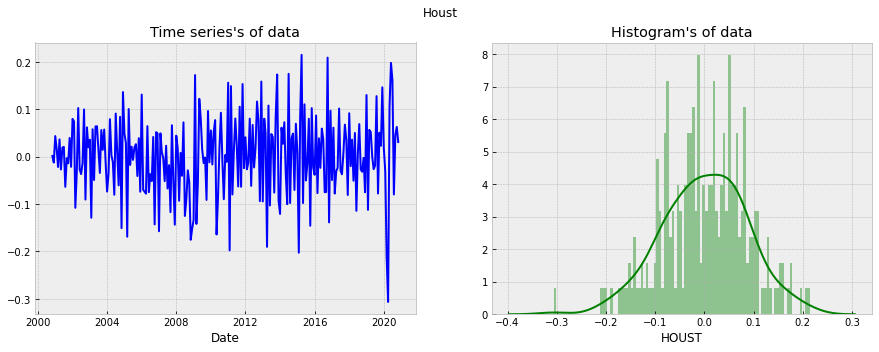

In [86]:
create_plot(houst, 'Houst')

In [87]:
ppi = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/PPIACO.csv')
ppi['PPI_change'] = (ppi.PPIACO / ppi.PPIACO.shift(1) - 1) * 100
ppi.DATE = pd.to_datetime(ppi.DATE)
ppi = ppi.set_index(ppi.DATE)
ppi = ppi.iloc[:, 2]
ppi = ppi[(ppi.index >= datetime(2000, 11, 1)) & (ppi.index <= datetime(2020, 11, 1))]
print(ppi.describe())

count    241.000000
mean       0.165321
std        1.188930
min       -5.332656
25%       -0.401606
50%        0.229183
75%        0.831734
max        2.985856
Name: PPI_change, dtype: float64


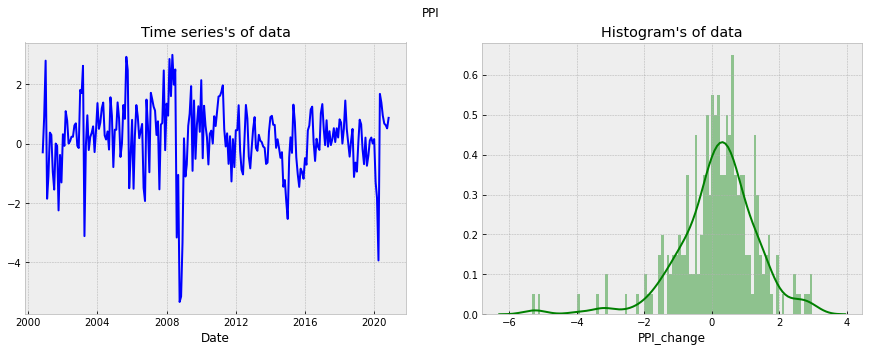

In [88]:
create_plot(ppi, 'PPI')

In [121]:
unrate = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/UNRATE.csv')
unrate.DATE = pd.to_datetime(unrate.DATE)
unrate = unrate.set_index(unrate.DATE)
unrate = unrate.iloc[:, 1]
#unrate = np.log(unrate).diff().fillna(0)
unrate = unrate[(unrate.index >= datetime(2000, 11, 1)) & (unrate.index <= datetime(2020, 11, 1))]
print(unrate.describe())

count    241.000000
mean       6.067635
std        1.982893
min        3.500000
25%        4.700000
50%        5.500000
75%        7.300000
max       14.800000
Name: UNRATE, dtype: float64


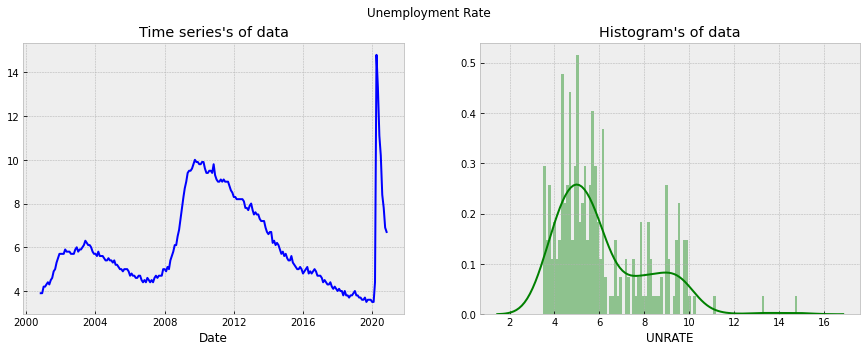

In [122]:
create_plot(unrate, 'Unemployment Rate')

In [125]:
#data = pd.concat([baa, cfnai, dtb, dsg, eff, houst, inf, nfc, ppi, unrate, vix, vxo, wti], axis = 1)
data = pd.concat([baa, cfnai, dtb, dsg, houst, inf, nfc, ppi, unrate, vix, wti], axis = 1)

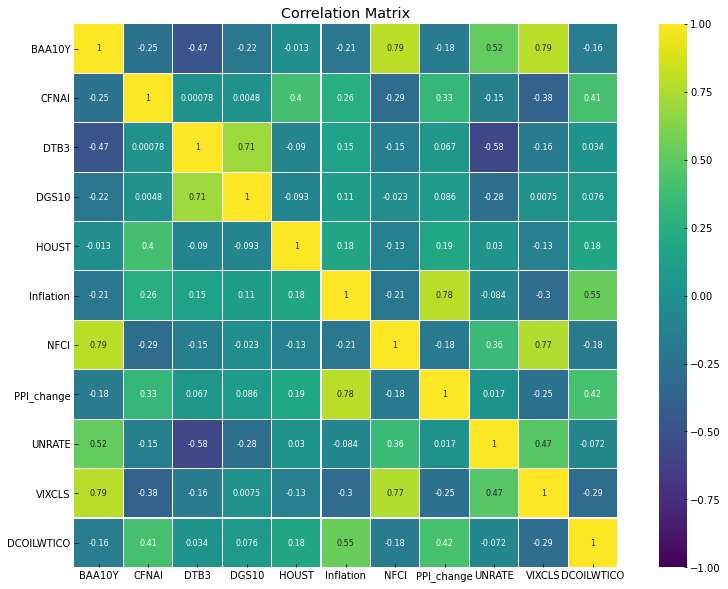

In [126]:
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(data.corr(), 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
ax.set_title('Correlation Matrix')
plt.show()

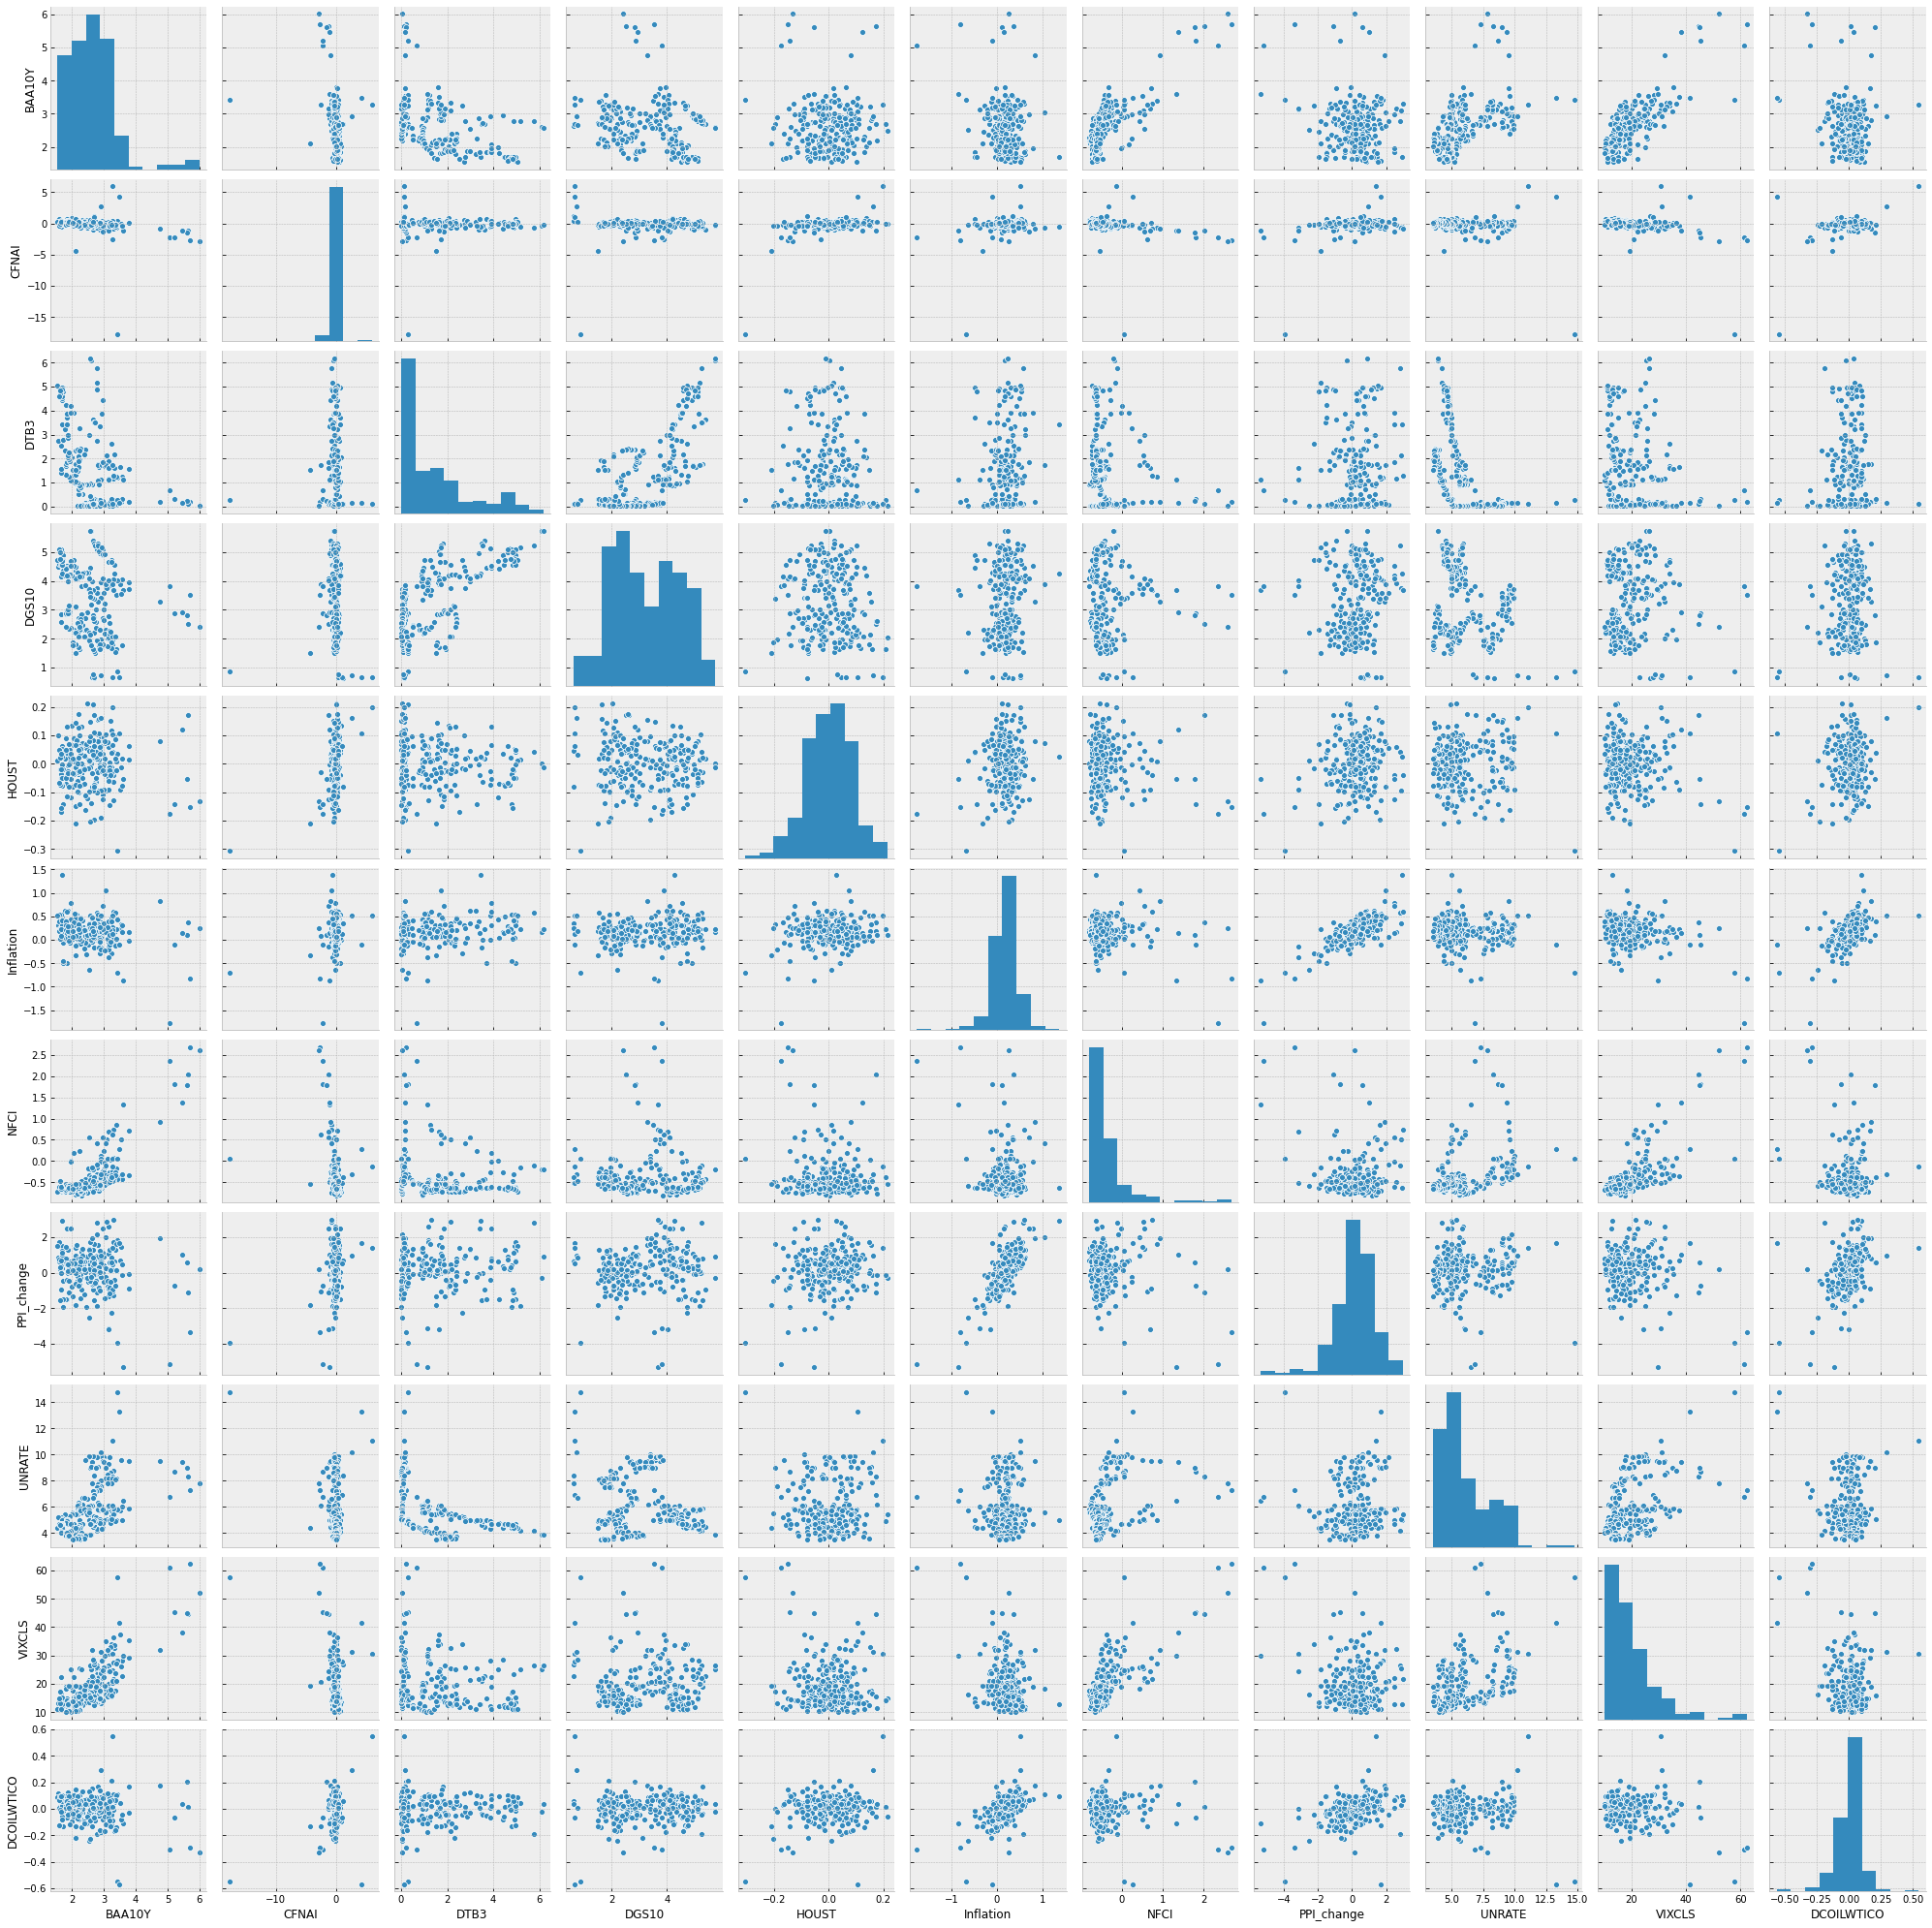

In [127]:
sns.pairplot(data)
plt.show()

In [166]:
display(data.describe())

,BAA10Y,CFNAI,DTB3,DGS10,HOUST,Inflation,NFCI,PPI_change,UNRATE,VIXCLS,DCOILWTICO
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,2.637810,-0.159046,1.425978,3.223692,0.000077,0.168942,-0.348602,0.165321,6.067635,19.806529,0.000680
std,0.750613,1.381864,1.591207,1.210803,0.085542,0.295561,0.550071,1.188930,1.982893,8.690204,0.107302
min,1.553000,-17.730000,0.011429,0.623636,-0.306508,-1.770548,-0.803402,-5.332656,3.500000,10.125455,-0.568191
25%,2.124545,-0.310000,0.104286,2.209130,-0.060594,0.041416,-0.637933,-0.401606,4.700000,13.853913,-0.046184
50%,2.624286,-0.040000,0.936957,3.011429,0.002499,0.186419,-0.515176,0.229183,5.500000,17.342500,0.014202
75%,2.989048,0.180000,2.126316,4.257273,0.059219,0.317125,-0.328058,0.831734,7.300000,23.612857,0.056842
max,6.008696,5.960000,6.171905,5.738571,0.214775,1.376849,2.674955,2.985856,14.800000,62.253500,0.545852
